In [52]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np

api_key = "RGAPI-891d995d-0baa-41d7-b7d9-1dc4e7070e3d"

def get_account_id(summoner_name):

    api_data = requests.get("https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{0}?api_key={1}".format(summoner_name, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))

#    print(json_data)

    return json_data['accountId']

def get_encrypted_summoner_id(summoner_name):

    api_data = requests.get("https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{0}?api_key={1}".format(summoner_name, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))

#    print(json_data)

    return json_data['id']

def get_match_history(account_id):

    api_data = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/{0}?api_key={1}".format(account_id, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))

    #pprint(json_data['matches'])

    game_id_list = [match['gameId'] for match in json_data['matches']]

    return game_id_list


def get_game_detail(game_id):

    api_data = requests.get("https://kr.api.riotgames.com//lol/match/v4/matches/{0}?api_key={1}".format(game_id, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))

#   pprint(json_data['participants'])

    return json_data


def get_timeline(match_id):
    
    api_data = requests.get("https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/{0}?api_key={1}".format(match_id, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data


def get_champion_masteries(encryptedSummonerId):
    
    api_data = requests.get("https://kr.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{0}?api_key={1}".format(encryptedSummonerId, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data


def get_champion_json():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/champion.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    champions_info = list(json_data.values())[3]
    
    champions_list = list(champions_info.values())
    
    champion_dict = {}
    
    for champion in champions_list:
        champion_dict[champion['key']] = champion['name']
    
    return champion_dict


def get_item_json():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/item.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']


def get_profile_icons_json(): 
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/profileicon.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']
    
    
def get_individual_champions(champion):
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/champion/%s.json" % champion)
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']


def get_masteries():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/mastery.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']


def get_runes():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/en_US/rune.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']


def get_summoner_spells():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.9.1/data/ko_KR/summoner.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data['data']

In [53]:
account_id = get_account_id("야너어어어엌")

def get_total_match_history(account_id):
    
    api_data = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/{0}?api_key={1}&beginIndex=100".format(account_id, api_key))
    #beginIndex=100을 넣어준 이유는 왜인지 모르겠는데, beginIndex=0일 때만 totalGames가 다르게 나옴(적게 나옴), 100부터는 그 뒤로 똑같이 나옴
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    total_games = json_data['totalGames']
    
    beginIndex = 0
    
    total_match_history = []
    
    while beginIndex < total_games + 1:

        api_data = requests.get("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/{0}?api_key={1}&beginIndex={2}".format(account_id, api_key, beginIndex))
    
        json_data = json.loads(api_data.content.decode("utf-8"))
    
        total_match_history.append(json_data['matches'])

        beginIndex += 100
    
    return total_match_history

total_match_history = get_total_match_history(account_id)

pprint(total_match_history[0][:3])


#total_games 경기까지의 match_history 구하는 함수
#가장 큰 list 한 개로 묶여있고, 최근 순으로 100경기가 한 개의 작은 list 안에 들어간 형태
#작은 list 다 없애고 큰 한 개의 list로 묶을 수 있는 방법 없나?

[{'champion': 28,
  'gameId': 3659959097,
  'lane': 'JUNGLE',
  'platformId': 'KR',
  'queue': 420,
  'role': 'NONE',
  'season': 13,
  'timestamp': 1557747014172},
 {'champion': 34,
  'gameId': 3658808527,
  'lane': 'MID',
  'platformId': 'KR',
  'queue': 430,
  'role': 'SOLO',
  'season': 13,
  'timestamp': 1557660795816},
 {'champion': 120,
  'gameId': 3658851282,
  'lane': 'JUNGLE',
  'platformId': 'KR',
  'queue': 420,
  'role': 'NONE',
  'season': 13,
  'timestamp': 1557659014359}]


In [47]:
data_gameId = []
data_championId = []

for i in range(len(total_match_history)):
    
    for j in range(len(total_match_history[i])):
        
        data_gameId.append(total_match_history[i][j]['gameId'])
        data_championId.append(total_match_history[i][j]['champion'])
        
#이 두 리스트는 한 계정의 전체 게임아이디와 전체 챔피언아이디가 들어가 있음
#이 밑에 생길 리스트들은 용량 문제인지 암튼 너무 느려져서 100개로 조절함

In [54]:
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []

for i in range(len(total_match_history[0])):
    data1.append(get_game_detail(total_match_history[0][i]['gameId']))
#for i in range(len(total_match_history[1])):
#    data2.append(get_game_detail(total_match_history[1][i]['gameId']))
#for i in range(len(total_match_history[2])):
#    data3.append(get_game_detail(total_match_history[2][i]['gameId']))
#for i in range(len(total_match_history[3])):
#    data4.append(get_game_detail(total_match_history[3][i]['gameId']))
#for i in range(len(total_match_history[4])):
#    data5.append(get_game_detail(total_match_history[4][i]['gameId']))
#for i in range(len(total_match_history[5])):
#    data6.append(get_game_detail(total_match_history[5][i]['gameId']))

#data = data1 + data2 + data3 + data4 +data5 +data6
        
#모든(EVERY) 게임 디테일을 한 리스트에 담으려다 보니 연산이 오래 걸리는 듯.. 과정? 용량? 줄일 수 있는 방법 없나..
#data를 6등분하였는데, 이것보다 더 쉬운 방법 없나?
#data1~6을 반복문을 사용할 수는 없나(ex. datai라던가..)
#이것도 오래걸린다, 그냥 양이 너무 많나?

#아님 100경기만 할까ㅎㅎㅜ

#participantId 쉽게 뽑을 수 있는 방법 찾고 싶다!!

In [28]:
data = []

for i in range(len(total_match_history)):
    for j in range(len(total_match_history[i])):
        data.append(get_game_detail(total_match_history[i][j]['gameId']))

data[0]

#담는 중, 9:43
#담았다. 9:50
#다 담지 말고 500개? 300개만 담아볼까?
#얘기해서 결정해야 할 듯


{'gameId': 3659959097,
 'platformId': 'KR',
 'gameCreation': 1557747014172,
 'gameDuration': 1783,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '9.9.272.4950',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': True,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 10,
   'inhibitorKills': 2,
   'baronKills': 0,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 25, 'pickTurn': 1},
    {'championId': 238, 'pickTurn': 2},
    {'championId': 56, 'pickTurn': 3},
    {'championId': 75, 'pickTurn': 4},
    {'championId': 53, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': False,
   'firstRiftHerald': False,
   'towerKills'

In [51]:
data1

#data1 안에 야너어어어엌이 92개 밖에 없다?!?
#게임 형식에 따라 다른가? 근데 야넠으로 가지고 온 데이터인데..
#game detail이 다른 게임처럼은 기록 안되는 게임이 있는 듯
#보니까 participantIdentities도 100개가 안됨, 이거 찾아야된다!!

[{'gameId': 3659959097,
  'platformId': 'KR',
  'gameCreation': 1557747014172,
  'gameDuration': 1783,
  'queueId': 420,
  'mapId': 11,
  'seasonId': 13,
  'gameVersion': '9.9.272.4950',
  'gameMode': 'CLASSIC',
  'gameType': 'MATCHED_GAME',
  'teams': [{'teamId': 100,
    'win': 'Win',
    'firstBlood': True,
    'firstTower': False,
    'firstInhibitor': True,
    'firstBaron': False,
    'firstDragon': True,
    'firstRiftHerald': False,
    'towerKills': 10,
    'inhibitorKills': 2,
    'baronKills': 0,
    'dragonKills': 1,
    'vilemawKills': 0,
    'riftHeraldKills': 0,
    'dominionVictoryScore': 0,
    'bans': [{'championId': 25, 'pickTurn': 1},
     {'championId': 238, 'pickTurn': 2},
     {'championId': 56, 'pickTurn': 3},
     {'championId': 75, 'pickTurn': 4},
     {'championId': 53, 'pickTurn': 5}]},
   {'teamId': 200,
    'win': 'Fail',
    'firstBlood': False,
    'firstTower': True,
    'firstInhibitor': False,
    'firstBaron': False,
    'firstDragon': False,
    'fi

In [49]:
len(data)

565

In [50]:
data_gameId = []
data_championId = []

for i in range(len(total_match_history[0])):
    data_gameId.append(total_match_history[0][i]['gameId'])

for i in range(len(data1)):
    for j in range(10):
        if data1[i]['participantIdentities'][j]['player']['accountId'] == account_id:
            
            data_championId.append(data1[i]['participants'][j]['championId'])
            
print(data_gameId)
print(data_championId)

#미치겠네 갑자기 왜 participantIdentities에러 뜨냐
#data1 안에 문제가 있는 듯..

KeyError: 'participantIdentities'

In [36]:
data_gameId = []
data_championId = []

for i in range(len(data)):
    data_gameId.append(data[i]['gameId'])
    for j in range(10):
        if data[i]['participantIdentities'][j]['player']['accountId'] == account_id:
            data_championId.append(data[i]['participants'][j]['championId'])

#전체 gameId와 championId를 담아보려 하는데 왜 말을 안듣냐.... 어제만 해도 됐는데

KeyError: 'gameId'

In [37]:
data_participantId = []

for i in range(len(data1)):
    for j in range(10):
        if data1[i]['participantIdentities'][j]['player']['accountId'] == account_id:
            data_participantId.append(data1[i]['participantIdentities'][j]['participantId'])
            
print(data_participantId)
#participantIdentities 왜 에러뜨냐 개화나네
#어 됐다!! 왜지?? data1만 구해서 그런가?..

KeyError: 'participantIdentities'

In [8]:
data_team = []

for i in range(len(data1)):
    for j in range(10):
        if data_participantId[i] == data1[i]['participants'][j]['participantId']:
            data_team.append(data1[i]['participants'][j]['teamId'])
            
print(data_team)
#team 구하는 과정

IndexError: list index out of range

In [9]:
data_win = []

for i in range(len(data1)):
    for j in range(2):
        if data_team[i] == data1[i]['teams'][j]['teamId']:
            data_win.append(data1[i]['teams'][j]['win'])

data_win1 = data_win.copy()

for i in range(len(data_win1)):
    if data_win1[i] == 'Win':
        data_win1[i] = 1
    else:
        data_win1[i] = 0
    
print(data_win)    
print(data_win1)
#win 구하는 과정

IndexError: list index out of range

In [10]:
encryptedSummonerId = get_encrypted_summoner_id("야너어어어엌")

champion_masteries = get_champion_masteries(encryptedSummonerId)

#pprint(champion_masteries)

champion_points = {}

for i in range(len(champion_masteries)):
    
    champion_points[champion_masteries[i]['championId']] = champion_masteries[i]['championPoints']

print(list(champion_points))
#숙련도 구하는 과정

[103, 42, 90, 28, 21, 63, 80, 13, 76, 120, 77, 104, 67, 23, 12, 64, 35, 203, 37, 51, 27, 81, 112, 72, 54, 55, 7, 238, 6, 45, 61, 114, 22, 154, 161, 24, 38, 110, 41, 202, 34, 74, 420, 84, 53, 32, 141, 131, 4, 5, 121, 157, 17, 60, 18, 62, 113, 30, 11, 136, 497, 240, 412, 9, 127, 3, 44, 56, 150, 85, 98, 101, 96, 102, 111, 267, 432, 10, 145, 429, 16, 68, 33, 222, 427, 40, 31, 43, 142, 236, 20, 36, 8, 29]


In [11]:
data_point = []

for i in range(len(data_championId[:100])):
    for j in range(len(list(champion_points))):
        if data_championId[i] == list(champion_points.keys())[j]:
            data_point.append(list(champion_points.values())[j])
            
#data_point
#한 계정의 매치 별 해당 챔프의 숙련도

In [81]:
data_df = pd.DataFrame(data_gameId[:100], columns = {'gameId'})
data_df['team'] = data_team
data_df['participantId'] = data_participantId
data_df['championId'] = data_championId[:100]
data_df['point'] = data_point
data_df['win(str)'] = data_win
data_df['win(int)'] = data_win1

data_df.head()

#100경기 표 구했닿ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ
#그래프 그리려면 승률도 필요한가,, 승률 어떻게 구하지~?~?~?

gameId  team  participantId  championId  point win(str)  win(int)
0  3658808527   100              5          34   1535     Fail         0
1  3658851282   100              3         120   9076      Win         1
2  3658735829   200              9          80  14977     Fail         0
3  3658669989   200              6         103  72990      Win         1
4  3655968230   200              7         120   9076      Win         1

In [87]:
import matplotlib.pyplot as plt






In [25]:
def get_league(encryptedSummonerId):
    
    api_data = requests.get("https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/{0}?api_key={1}".format(encryptedSummonerId, api_key))

    json_data = json.loads(api_data.content.decode("utf-8"))
    
    return json_data

#get_league(encryptedSummonerId)

In [52]:
ptId = []
lane = []
summonerName = []
game = get_match_history(account_id)
game1 = 3658808527
detail = get_game_detail(game1)

for i in range(10):
    ptId.append(detail['participants'][i]['participantId'])
    lane.append(detail['participants'][i]['timeline']['lane'])
    summonerName.append(detail['participantIdentities'][i]['player']['summonerName'])

df = pd.DataFrame(ptId, columns = {'participantId'})
df['lane'] = lane
df['summonerName'] = summonerName

df

#왜 TOP이 두 번 생기는 경우가 있는 거지? 3658808527판의 탑 정글만함은 미드 카타리나였음.

participantId    lane   summonerName
0              1  BOTTOM  Troll Mania F
1              2  JUNGLE            이 볼
2              3  BOTTOM          그의 남탓
3              4     TOP           카 Ol
4              5  MIDDLE         야너어어어엌
5              6  BOTTOM           용마거리
6              7     TOP          시오후키스
7              8     TOP         탑 정글만함
8              9  BOTTOM      G O A O G
9             10  JUNGLE        Gustang

In [30]:
teamId_dict = {100 : "Red", 200: "Blue"}

champion_dict = get_champion_json()

for i in range(10):
    championId = detail['participants'][i]['championId']
    print(champion_dict[str(championId)])
    teamId = detail['participants'][i]['teamId']
    print(teamId_dict[teamId])

모르가나
Red
리 신
Red
루시안
Red
아칼리
Red
애니비아
Red
미스 포츈
Blue
피오라
Blue
카타리나
Blue
카이사
Blue
마스터 이
Blue


In [31]:
timeline = get_timeline(detail['gameId'])

#pprint(timeline)

In [32]:
tl1 = []
tl2 = []
tl3 = []
tl4 = []
tl5 = []
tl6 = []
tl7 = []
tl8 = []
tl9 = []
tl10 = []

for i in range(len(timeline['frames']) - 1):
    tl1.append(timeline['frames'][i]['participantFrames']['1']['position'])
    tl2.append(timeline['frames'][i]['participantFrames']['2']['position'])
    tl3.append(timeline['frames'][i]['participantFrames']['3']['position'])
    tl4.append(timeline['frames'][i]['participantFrames']['4']['position'])
    tl5.append(timeline['frames'][i]['participantFrames']['5']['position'])
    tl6.append(timeline['frames'][i]['participantFrames']['6']['position'])
    tl7.append(timeline['frames'][i]['participantFrames']['7']['position'])
    tl8.append(timeline['frames'][i]['participantFrames']['8']['position'])
    tl9.append(timeline['frames'][i]['participantFrames']['9']['position'])
    tl10.append(timeline['frames'][i]['participantFrames']['10']['position'])
    
#이런 작업 더 효율적으로 할 수 있는지

In [33]:
top = pd.DataFrame(tl1)
ad = pd.DataFrame(tl2)
mid = pd.DataFrame(tl3)
jug = pd.DataFrame(tl4)
sup = pd.DataFrame(tl5)

#각 라인을 어떻게 자동으로 연결시킬 것인지 (participant 1이 top임을 자동으로 알 수 있는 방법?)
#bottom을 어떻게 원딜과 서포터로 나눌 것인지
#동선 파악이 어떤 의미를 가지는지

In [34]:
from PIL import Image
import numpy as np

def get_map_image():
    
    map_image = Image.open("map.png", "r")
    map_image = map_image.resize((1500,1500))
    return np.asarray(map_image)

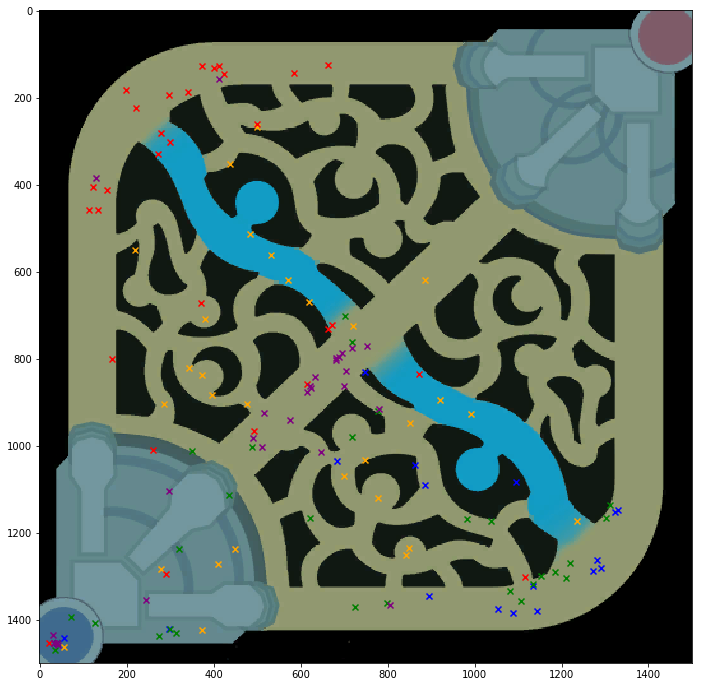

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.scatter([top['x'] / 10 ],[(15000 - top['y'])/10 ], zorder=1, color='blue', marker = 'x')
plt.scatter([ad['x'] / 10 ],[(15000 - ad['y'])/10 ], zorder=1, color='orange', marker = 'x')
plt.scatter([mid['x'] / 10 ],[(15000 - mid['y'])/10 ], zorder=1, color='green', marker = 'x')
plt.scatter([jug['x'] / 10 ],[(15000 - jug['y'])/10 ], zorder=1, color='red', marker = 'x')
plt.scatter([sup['x'] / 10 ],[(15000 - sup['y'])/10 ], zorder=1, color='purple', marker = 'x')
plt.imshow(get_map_image(), zorder=0)
plt.show()

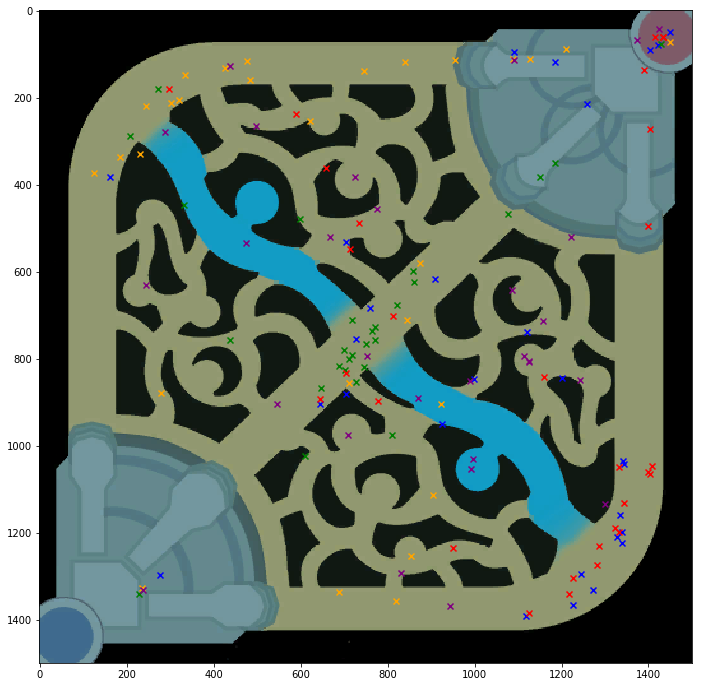

In [37]:
top = pd.DataFrame(tl6)
ad = pd.DataFrame(tl7)
mid = pd.DataFrame(tl8)
jug = pd.DataFrame(tl9)
sup = pd.DataFrame(tl10)

plt.figure(figsize=(12,12))
plt.scatter([top['x'] / 10 ],[(15000 - top['y'])/10 ], zorder=1, color='blue', marker = 'x')
plt.scatter([ad['x'] / 10 ],[(15000 - ad['y'])/10 ], zorder=1, color='orange', marker = 'x')
plt.scatter([mid['x'] / 10 ],[(15000 - mid['y'])/10 ], zorder=1, color='green', marker = 'x')
plt.scatter([jug['x'] / 10 ],[(15000 - jug['y'])/10 ], zorder=1, color='red', marker = 'x')
plt.scatter([sup['x'] / 10 ],[(15000 - sup['y'])/10 ], zorder=1, color='purple', marker = 'x')
plt.imshow(get_map_image(), zorder=0)
plt.show()

In [39]:
item_dict = get_item_json()

champion_dict = get_champion_json()

account_id = get_account_id("야너어어어엌")

game_id_list = get_match_history(account_id)

data = get_timeline(game_id_list[0])

data2 = get_game_detail(game_id_list[0])

In [40]:
game_champion = {}

for participant in data2['participants']:
    
    game_champion[participant['participantId']] = champion_dict[str(participant['championId'])]
    
pprint(game_champion)

{1: '모르가나',
 2: '리 신',
 3: '루시안',
 4: '아칼리',
 5: '애니비아',
 6: '미스 포츈',
 7: '피오라',
 8: '카타리나',
 9: '카이사',
 10: '마스터 이'}


In [41]:
import matplotlib as mpl
import matplotlib.font_manager as fm


print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

pprint(font_list[:10])
#print(font_list)

버전:  3.0.2
설치 위치:  C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\LENOVO\.matplotlib
캐시 위치:  C:\Users\LENOVO\.matplotlib
설정파일 위치:  C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
['C:\\Windows\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Windows\\Fonts\\MTEXTRA.TTF',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\SNAP____.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\LBRITED.TTF']


0.6분에 구매한 아이템 : 도란의 방패
0.6분에 구매한 아이템 : 체력 물약
2.8분에 사라진 아이템 : 체력 물약
4.1분에 구매한 아이템 : 마법공학 리볼버
4.2분에 구매한 아이템 : 체력 물약
5.4분에 사라진 아이템 : 체력 물약
6.7분에 구매한 아이템 : 흡혈의 낫
6.7분에 구매한 아이템 : 체력 물약
6.7분에 구매한 아이템 : 제어 와드
7.5분에 사라진 아이템 : 체력 물약
10.0분에 사라진 아이템 : 제어 와드
10.2분에 구매한 아이템 : 마법공학 총검
10.2분에 사라진 아이템 : 흡혈의 낫
10.2분에 사라진 아이템 : 마법공학 리볼버
10.3분에 구매한 아이템 : 속도의 장화
10.3분에 구매한 아이템 : 체력 물약
10.3분에 구매한 아이템 : 체력 물약
11.7분에 사라진 아이템 : 체력 물약
12.1분에 사라진 아이템 : 체력 물약
15.0분에 구매한 아이템 : 마법사의 신발
15.0분에 사라진 아이템 : 속도의 장화
15.1분에 구매한 아이템 : 망각의 구
15.1분에 구매한 아이템 : 방출의 마법봉
18.8분에 사라진 아이템 : 와드 토템 (장신구)
19.9분에 구매한 아이템 : 모렐로노미콘
19.9분에 사라진 아이템 : 망각의 구
19.9분에 사라진 아이템 : 방출의 마법봉
19.9분에 구매한 아이템 : 추적자의 팔목 보호대
20.6분에 구매한 아이템 : 초시계
21.8분에 사라진 아이템 : 전령의 눈
23.2분에 구매한 아이템 : 존야의 모래시계
23.2분에 사라진 아이템 : 추적자의 팔목 보호대
23.2분에 사라진 아이템 : 초시계
23.5분에 구매한 아이템 : 방출의 마법봉
26.4분에 구매한 아이템 : 라일라이의 수정홀
26.4분에 사라진 아이템 : 방출의 마법봉
26.4분에 구매한 아이템 : 쓸데없이 큰 지팡이


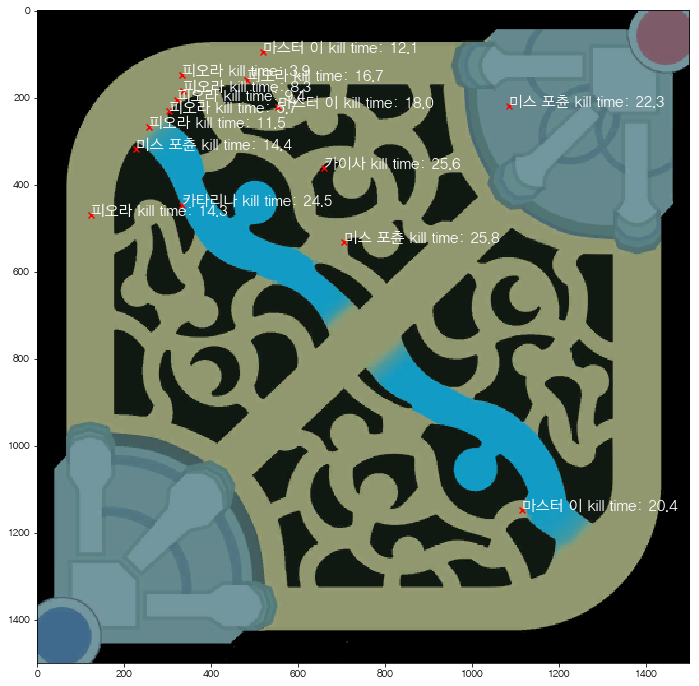

In [42]:
events = [timeline['frames'][event]['events'] for event in range(len(timeline['frames']) - 1)]
positions = []
victims = []
kill_times = []
for event in events:
    for each_event in event:
        time = each_event['timestamp'] / 60000
        if each_event['type'] == 'ITEM_PURCHASED' and each_event['participantId'] == 4:
            item_name = item_dict[str(each_event['itemId'])]['name']
            print(f'{time:0.1f}분에 구매한 아이템 : {item_name}')        
        elif each_event['type'] == 'ITEM_DESTROYED' and each_event['participantId'] == 4:
            item_name = item_dict[str(each_event['itemId'])]['name']
            print(f'{time:0.1f}분에 사라진 아이템 : {item_name}')
        elif each_event['type'] == 'CHAMPION_KILL' and each_event['killerId'] == 4:
            position = each_event['position']
            victimId = each_event['victimId']
            champion = game_champion[victimId]
            positions.append(position)
            victims.append(champion)
            kill_times.append(time)
            
plt.figure(figsize=(12, 12))
path = 'C:\\Windows\\Fonts\\윤고딕320.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
plt.scatter([position['x'] / 10 for position in positions],[(15000 - position['y'])/10 for position in positions], zorder=1, color='red', marker = 'x')
for i in range(len(victims)):    
    plt.text(positions[i]['x'] / 10, (15000 - positions[i]['y']) / 10, f'{victims[i]} kill time: {kill_times[i]:0.1f}', fontsize=15, color='white')
plt.imshow(get_map_image(), zorder=0)
plt.show()